In [2]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/working/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/working/YogaPoses\Downdog\00000000.jpg
/kaggle/working/YogaPoses\Downdog\00000001.jpg
/kaggle/working/YogaPoses\Downdog\00000002.jpg
/kaggle/working/YogaPoses\Downdog\00000003.jpg
/kaggle/working/YogaPoses\Downdog\00000004.jpg
/kaggle/working/YogaPoses\Downdog\00000007.jpg
/kaggle/working/YogaPoses\Downdog\00000008.jpg
/kaggle/working/YogaPoses\Downdog\00000009.jpg
/kaggle/working/YogaPoses\Downdog\00000010.jpg
/kaggle/working/YogaPoses\Downdog\00000011.jpg
/kaggle/working/YogaPoses\Downdog\00000012.jpg
/kaggle/working/YogaPoses\Downdog\00000014.jpg
/kaggle/working/YogaPoses\Downdog\00000016.jpg
/kaggle/working/YogaPoses\Downdog\00000017.jpg
/kaggle/working/YogaPoses\Downdog\00000018.jpg
/kaggle/working/YogaPoses\Downdog\00000019.jpg
/kaggle/working/YogaPoses\Downdog\00000020.jpg
/kaggle/working/YogaPoses\Downdog\00000022.jpg
/kaggle/working/YogaPoses\Downdog\00000023.jpg
/kaggle/working/YogaPoses\Downdog\00000024.jpg
/kaggle/working/YogaPoses\Downdog\00000025.jpg
/kaggle/worki

In [30]:
import os
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

# Initializing mediapipe pose class.
mp_pose = mp.solutions.pose

# Setting up the Pose function.
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3, model_complexity=2)

# Initializing mediapipe drawing class, useful for annotation.
mp_drawing = mp.solutions.drawing_utils

# Function to process images and save output
def process_images(input_folder, output_folder):
    # Check if output folder exists, create if not
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Loop through all the files in the input folder
    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Read an image from the specified path.
            input_path = os.path.join(input_folder, filename)
            sample_img = cv2.imread(input_path)

            # Perform pose detection after converting the image into RGB format.
            results = pose.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))

            # Check if any landmarks are found.
            if results.pose_landmarks:
                # Draw Pose landmarks on the sample image.
                mp_drawing.draw_landmarks(image=sample_img, landmark_list=results.pose_landmarks,
                                          connections=mp_pose.POSE_CONNECTIONS)

                # Save the output image
                output_path = os.path.join(output_folder, filename)
                cv2.imwrite(output_path, sample_img)

                # Display the output image with the landmarks drawn (optional)
                plt.figure(figsize=[10, 10])
                plt.title("Output")
                plt.axis('off')
                plt.imshow(sample_img[:, :, ::-1])
                plt.show()


In [31]:
import os
import random as r
files = []
for dirname, _, filenames in os.walk('/kaggle/working/YogaPoses/Downdog'):
    for filename in filenames:
        files.append(os.path.join(dirname, filename))
r.shuffle(files)

In [32]:
for i in range(10):
    print(files[i])

/kaggle/working/YogaPoses/Downdog\00000352.jpg
/kaggle/working/YogaPoses/Downdog\00000150.jpg
/kaggle/working/YogaPoses/Downdog\00000154.jpg
/kaggle/working/YogaPoses/Downdog\00000394.jpg
/kaggle/working/YogaPoses/Downdog\00000084.jpg
/kaggle/working/YogaPoses/Downdog\00000137.jpg
/kaggle/working/YogaPoses/Downdog\00000009.jpg
/kaggle/working/YogaPoses/Downdog\00000098.jpg
/kaggle/working/YogaPoses/Downdog\00000279.jpg
/kaggle/working/YogaPoses/Downdog\00000062.jpg


In [33]:
# Initializing mediapipe pose class.
mp_pose = mp.solutions.pose

# Setting up the Pose function.
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3, model_complexity=2)

# Initializing mediapipe drawing class, useful for annotation.
mp_drawing = mp.solutions.drawing_utils

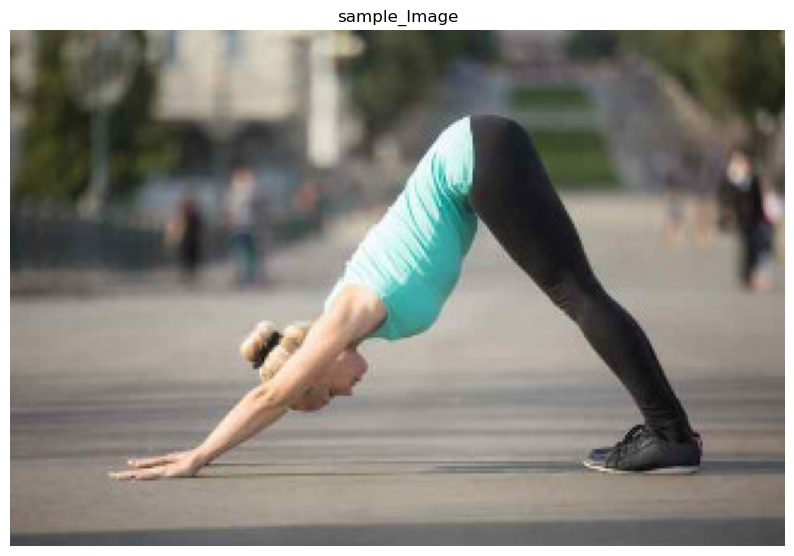

In [59]:
#Input_Image
sample_img  = cv2.imread(files[17])
plt.figure(figsize = [10,10])
plt.title("sample_Image");plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()

In [60]:
# Perform pose detection after converting the image into RGB format.
results = pose.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))

# Check if any landmarks are found.
if results.pose_landmarks:
    
    # Iterate two times as we only want to display first two landmarks.
    for i in range(2):
        
        # Display the found normalized landmarks.
        print(f'{mp_pose.PoseLandmark(i).name}:\n{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]}') 

NOSE:
x: 0.420344263
y: 0.701879501
z: 0.0269769076
visibility: 0.997633696

LEFT_EYE_INNER:
x: 0.401426226
y: 0.701780796
z: -0.00412006816
visibility: 0.995756



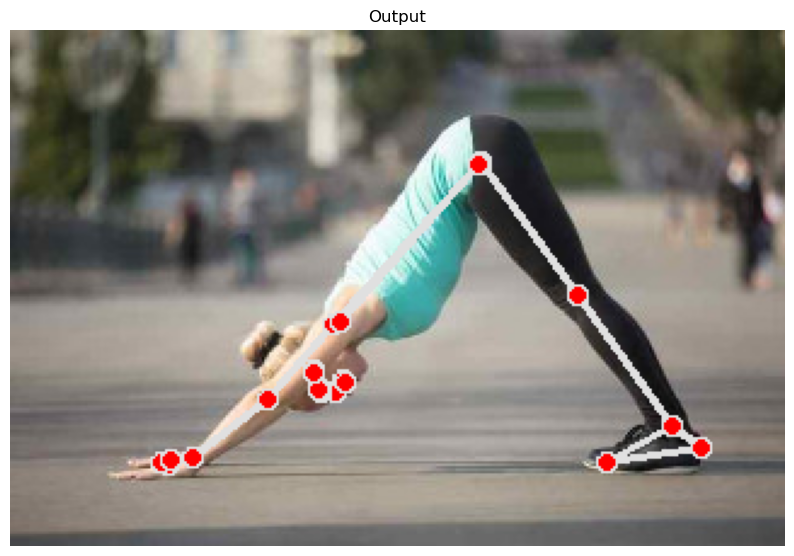

In [61]:
img_copy = sample_img.copy()

# Check if any landmarks are found.
if results.pose_landmarks:
    
    # Draw Pose landmarks on the sample image.
    mp_drawing.draw_landmarks(image=img_copy, landmark_list=results.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)
       
    # Specify a size of the figure.
    fig = plt.figure(figsize = [10, 10])

    # Display the output image with the landmarks drawn, also convert BGR to RGB for display. 
    plt.title("Output");plt.axis('off');plt.imshow(img_copy[:,:,::-1]);plt.show()

In [43]:
def detectPose(image, pose, display=True):
        
    # Create a copy of the input image.
    output_image = image.copy()
    
    # Convert the image from BGR into RGB format.
    imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Perform the Pose Detection.
    results = pose.process(imageRGB)
    
    # Retrieve the height and width of the input image.
    height, width, _ = image.shape
    
    # Initialize a list to store the detected landmarks.
    landmarks = []
    
    # Check if any landmarks are detected.
    if results.pose_landmarks:
    
        # Draw Pose landmarks on the output image.
        mp_drawing.draw_landmarks(image=output_image, landmark_list=results.pose_landmarks,
                                  connections=mp_pose.POSE_CONNECTIONS)
        
        # Iterate over the detected landmarks.
        for landmark in results.pose_landmarks.landmark:
             # Append the landmark into the list.
            landmarks.append((int(landmark.x * width), int(landmark.y * height),
                                  (landmark.z * width)))
    
    # Check if the original input image and the resultant image are specified to be displayed.
    if display:
    
        # Display the original input image and the resultant image.
        plt.figure(figsize=[22,22])
        plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
        plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');
        
        # Also Plot the Pose landmarks in 3D.
        mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
        
    # Otherwise
    else:
        # Return the output image and the found landmarks.
        return output_image, landmarks

In [11]:
def calculateAngle(landmark1, landmark2, landmark3):
   
    # Get the required landmarks coordinates.
    x1, y1, _ = landmark1
    x2, y2, _ = landmark2
    x3, y3, _ = landmark3

    # Calculate the angle between the three points
    angle = math.degrees(math.atan2(y3 - y2, x3 - x2) - math.atan2(y1 - y2, x1 - x2))
    
    # Check if the angle is less than zero.
    if angle < 0:

        # Add 360 to the found angle.
        angle += 360
     # Return the calculated angle.
    return angle

In [12]:
#data collector
def angles_finder(landmarks):
    
    # Get the angle between the left shoulder, elbow and wrist points. 
    left_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value])
    
    # Get the angle between the right shoulder, elbow and wrist points. 
    right_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value])   
    
    # Get the angle between the left elbow, shoulder and hip points. 
    left_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                         landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                         landmarks[mp_pose.PoseLandmark.LEFT_HIP.value])

    # Get the angle between the right hip, shoulder and elbow points. 
    right_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                          landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                          landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value])

    # Get the angle between the left hip, knee and ankle points. 
    left_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_HIP.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value])

    # Get the angle between the right hip, knee and ankle points 
    right_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value])
    
    #----------------------------------------------------------------------------------------------------------------
    return [left_elbow_angle,right_elbow_angle,left_shoulder_angle,right_shoulder_angle,left_knee_angle,right_knee_angle]

In [13]:
def grab_data(file):
    image = cv2.imread(file)
    label = file.split('/')[6]
    output_image, landmarks = detectPose(image, pose, display=False)
    if landmarks:
        print(label)
        print(angles_finder(landmarks))

In [14]:
'/kaggle/working/yoga-pose-classification/YogaPoses/Downdog'.split("/")[5]

'Downdog'

In [15]:
import pandas as pd

In [16]:
df = pd.DataFrame(columns = ['Label','left_elbow_angle','right_elbow_angle','left_shoulder_angle','right_shoulder_angle','left_knee_angle','right_knee_angle'])
print(df)

Empty DataFrame
Columns: [Label, left_elbow_angle, right_elbow_angle, left_shoulder_angle, right_shoulder_angle, left_knee_angle, right_knee_angle]
Index: []


In [17]:
import math

for i in range(len(files)-1):
    image = cv2.imread(files[i])
    label = files[i].split('/')[4]
    output_image, landmarks = detectPose(image, pose, display=False)
    if landmarks:
        r = angles_finder(landmarks)
        df = pd.concat([df,pd.DataFrame.from_records([{'Label':label,'left_elbow_angle':r[0],'right_elbow_angle':r[1],'left_shoulder_angle':r[2],'right_shoulder_angle':r[3],'left_knee_angle':r[4],'right_knee_angle':r[5]}])])

C:\Users\ASUS\anaconda3\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11052\3270507930.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df,pd.DataFrame.from_records([{'Label':label,'left_elbow_angle':r[0],'right_elbow_angle':r[1],'left_shoulder_angle':r[2],'right_shoulder_angle':r[3],'left_knee_angle':r[4],'right_knee_angle':r[5]}])])


In [18]:
df.head(5)

,Label,left_elbow_angle,right_elbow_angle,left_shoulder_angle,right_shoulder_angle,left_knee_angle,right_knee_angle
0,Downdog\00000037.jpg,188.898313,169.950651,210.722411,160.734212,183.770109,179.121234
0,Downdog\00000416.jpg,192.806255,199.789395,182.276480,173.761303,177.469237,177.464778
0,Downdog\00000393.jpg,194.581901,193.500506,179.471756,180.792892,186.632937,186.282492
0,Downdog\00000151.jpg,166.910708,166.172420,187.765166,176.650231,181.306332,179.161877
0,Downdog\00000083.jpg,157.121942,161.037378,165.428298,191.533104,178.934155,180.543072


In [19]:
import os
import math
import cv2
import pandas as pd

# Initialize an empty dataframe
df = pd.DataFrame()

# Path to the root directory containing subfolders with images
root_directory = 'D:/Desktop/DSET'

# Traverse through all subdirectories and files
for subdir, _, files in os.walk(root_directory):
    for file in files:
        # Construct the full file path
        file_path = os.path.join(subdir, file)
        
        # Read the image
        image = cv2.imread(file_path)
        
        # Extract the label (pose) from the subdirectory name
        label = os.path.basename(subdir)
        
        # Detect pose and get landmarks
        output_image, landmarks = detectPose(image, pose, display=False)
        
        # If landmarks are found, calculate the angles and append to the DataFrame
        if landmarks:
            r = angles_finder(landmarks)
            df = pd.concat([df, pd.DataFrame.from_records([{
                'Label': label,
                'left_elbow_angle': r[0],
                'right_elbow_angle': r[1],
                'left_shoulder_angle': r[2],
                'right_shoulder_angle': r[3],
                'left_knee_angle': r[4],
                'right_knee_angle': r[5]
            }])])


# Specify the output JSON file path
output_json_path = 'C:/Users/ASUS/Documents/angles_output.json'

# Reset the index of the DataFrame
df.reset_index(drop=True, inplace=True)

# Save the DataFrame to a JSON file with exception handling
try:
    df.to_json(output_json_path, orient='records', lines=True)
    print(f"File saved successfully to {output_json_path}")
except PermissionError as e:
    print(f"PermissionError: {e}")
except Exception as e:
    print(f"An error occurred: {e}")

C:\Users\ASUS\anaconda3\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


File saved successfully to C:/Users/ASUS/Documents/angles_output.json
